In [1]:
from google.colab import drive
import os
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/health_education_data')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# importacion de funciones

# Se importa la ruta se almacenamiento de los conjuntos de datos
from config import ruta

# Se importan las funciones para cargar los conjuntos de datos
from data_loader import (
                        load_afiliaciones,
                        load_centros_poblados,
                        load_instituciones_educativas
                        )

# Se importan las funciones para el prepocesamiento de los datos
from preprocess import(
                      estandarizar_nombres_columnas,
                      limpiar_texto,
                      eliminar_columnas_afiliaciones,
                      eliminar_columnas_ie,
                      eliminar_columnas_centros_poblados,
                      validar_nulos,
                      eliminar_nulos_afiliaciones,
                      buscar_duplicados,
                      analisis_afiliaciones_ie,
                      ver_info_dfs,
                      transformacion_col_area_geografica,
                      cambios_tipo_dato,
                      val_unicos_col_ano,
                      filtrar_col_ano,
                      val_unicos_col_municipio,
                      quitar_tildes,
                      limpieza_datos,
                      listar_val_unicos_edad,
                      columnas_categoricas,
                      columnas_numericas,
                      llenar_listas_nom_col,
                      crear_agregacion_afiliacion,
                      crear_agregacion_centros_poblados,
                      crear_agregacion_ie,
                      union_afiliacion_centros_poblados,
                      union_centros_poblados_ie,
                      linpieza_df_unificado
                      )

# Se importan las funciones para el entrenamiento y validacion de los modelos predictivos
from predictions import(
                        entrenamiento_validacion_prediciones_poblacion,
                        visualizacion_poblacion_real_vs_predicha,
                        entrenamiento_validacion_prediciones_cobertura_salud,
                        visualizacion_cobertura_salud_real_vs_predicha,
                        proyecciones_poblacion_cobertura_salud
                       )

# Se importan las funciones para el modelo de clusterizacion
from clustering import(
                        metodo_codo,
                        visualizacion_clusters__poblacion_rural_cobertura_salud
                       )

# Se importan las funciones para la creacion de los graficos
from visualizations import(
                          histograma_col_ano_afiliaciones,
                          histograma_col_edad_afiliaciones,
                          histograma_col_ano_centros_poblados,
                          distribucion_genero_centros_poblados,
                          distribucion_genero_afiliaciones,
                          frecuencia_afiliacion_municipio,
                          frecuencia_regimen_afiliacion,
                          frecuencia_estado_afiliacion,
                          frecuencia_area_geografica_centros_poblados,
                          frecuencia_ie_municipio,
                          frecuencia_ie_vereda,
                          mapacorrelacion_variables,
                          ie_rural_vsr_regimen_sudsidiado,
                          ie_rural_vs_regimen_contributivo,
                          porcentaje_poblacion_rural_municipio_vs_ie_Vereda,
                          porcentaje_poblacion_rural_municipio_vs_ie_vereda,
                          porcentaje_poblacion_rural_municipio_vs_porcentaje_afiliados_subsidiado,
                          porcentaje_poblacion_urbana_municipio_vs_porcentaje_afiliados_subsidiado
                          )

In [3]:
# Se asigna la ruta de almacenamiento de los conjuntos de datos
data_dir = ruta()

print('-'*100)
print(f'Validacion de la carga de conjunto de datos afiliaciones')
print('-'*100)
df_afiliaciones = load_afiliaciones(data_dir)
print(df_afiliaciones.info(),'\n')

print('-'*100)
print(f'Validacion de la carga de conjunto de datos centros poblados')
print('-'*100)
df_centros_poblados = load_centros_poblados(data_dir)
print(df_centros_poblados.info(),'\n')

print('-'*100)
print(f'Validacion de la carga de conjunto de datos instituciones_educativas')
print('-'*100)
df_ie = load_instituciones_educativas(data_dir)
print(df_ie.info(),'\n')


# Creacion de listas con nombres de las columnas numericas y categoricas
col_num_afiliaciones = []
col_num_copia_centros_poblados = []
col_num_instituciones_educativas = []

col_cat_afiliaciones = []
col_cat_copia_centros_poblados = []
col_cat_instituciones_educativas = []


----------------------------------------------------------------------------------------------------
Validacion de la carga de conjunto de datos afiliaciones
----------------------------------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2369882 entries, 0 to 2369881
Data columns (total 11 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   AÑO                    int64  
 1   CODIGO MUNICIPIO       int64  
 2   MUNICIPIO              object 
 3   CODIGO ADMINISTRADORA  object 
 4   ADMINISTRADORA         object 
 5   EDAD                   float64
 6   SEXO                   object 
 7   NIVEL                  object 
 8   ZONA                   object 
 9   REGIMEN                object 
 10  ESTADO                 object 
dtypes: float64(1), int64(2), object(8)
memory usage: 198.9+ MB
None 

-----------------------------------------------------------------------------------------

Se realiza de manera satisfactoria la carga de los conjuntos de datos. Despues de analizar las columnas y su aporte para el proyecto, se toma la desicion de trabajar unicamente con las siguientes en cada conjunto de datos:

**Afiliaciones** :**año**, **municipio**, **edad**, **sexo**, **regimen** y **estado**.

**centros poblados** :**año**, **municipio**, **total hombres**, **total mujeres**. La columna **area geografica** se clasificara en rural y urbana para cada municipio.

**instituciones educativas** :**municipio** y **vereda**.

Las demas columnas seras suprimidas.

In [4]:
# Eliminar columnas no utiles para el analisis
df_afiliaciones = eliminar_columnas_afiliaciones(df_afiliaciones)

# Eliminar columnas no utiles para el analisis
df_centros_poblados = eliminar_columnas_centros_poblados(df_centros_poblados)

# Eliminar columnas no utiles para el analisis
df_ie = eliminar_columnas_ie(df_ie)

# Verificacion de valores nulos
validar_nulos(df_afiliaciones, df_centros_poblados, df_ie)

--------------- Valores nulos en afiliaciones:  
 AÑO          0
MUNICIPIO    1
EDAD         0
SEXO         0
REGIMEN      0
ESTADO       1
dtype: int64 

--------------- Valores nulos en centros poblados:  
 MUNICIPIO          0
AÑO                0
ÁREA GEOGRÁFICA    0
Total Hombres      0
Total Mujeres      0
dtype: int64 

--------------- Valores nulos en instituciones educativas:  
 MUNICIPIO    0
VEREDA       0
dtype: int64 



La eliminaciòn de columnas no relevantes para el analisis, se suprimieron satisfactiriamente. Tambien se validaron los valores nulos y solo existe 1 en el conjunto de datos Afiliaciones, este se borrara.

In [5]:
df_afiliaciones = eliminar_nulos_afiliaciones(df_afiliaciones)

--------------- Valores nulos en afiliaciones:  
 AÑO          0
MUNICIPIO    0
EDAD         0
SEXO         0
REGIMEN      0
ESTADO       0
dtype: int64 



Se suprimio satisfactoriamente la fila con valores nulos en el conjunto de datos Afiliaciones. Se continua con el preprocesamiento de los datos

# Limpieza y estandarizacion de los datos

In [6]:
# Se estandarizan los datos y los nombres de las columnas, se eliminan tildes y caracteres especiales
# en los tres conjuntos de datos
df_afiliaciones = limpieza_datos(df_afiliaciones)
df_centros_poblados = limpieza_datos(df_centros_poblados)
df_ie = limpieza_datos(df_ie)

print("-"*20, "df_afiliaciones","-"*20)
print(df_afiliaciones.sample(3), '\n')

print("-"*20, "df_centros_poblados","-"*20)
print(df_centros_poblados.sample(3), '\n')

print("-"*20, "df_instituciones_educativas","-"*20)
print(df_ie.sample(3))

-------------------- df_afiliaciones --------------------
          ano      municipio  edad sexo     regimen estado
1320131  2022      aquitania   3.0    f  subsidiado     ac
1517307  2022  puerto boyaca  30.0    f  subsidiado     ac
1700442  2022      moniquira  69.0    m  subsidiado     ac 

-------------------- df_centros_poblados --------------------
     municipio   ano                    area_geografica total_hombres  \
1465    umbita  2023  centros poblados y rural disperso         3,448   
925    otanche  2022  centros poblados y rural disperso         2,430   
424      chita  2021  centros poblados y rural disperso         3,100   

     total_mujeres  
1465         3,159  
925          2,106  
424          2,876   

-------------------- df_instituciones_educativas --------------------
     municipio                    vereda
191   chiquiza                  el cerro
647     maripi  sector la vega del tigre
1619    tutaza                    paramo


Todos los nombres de las columnas y su contenido se paso a minuscula y se eliminaron tildes y demás caracteres especiales para poder estandarizar los datos y continuar con el analísis.

El siguiente paso es revisar la presencia de filas duplicadas

In [7]:
# Se buscan valores duplicados en los tres conjuntos de datos

buscar_duplicados(df_afiliaciones, df_centros_poblados, df_ie)

--------------- Valores duplicados en afiliaciones:  
 2269572 

--------------- Valores duplicados en centros poblados:  
 0 

--------------- Valores duplicados en instituciones educativas:  
 286 



Se hallan mas de 2.000.000 de filas duplicadas en el conjunto de datos **afiliaciones** y 286 filas dupplicadas en el conjunto de datos **instituciones educativas**. Se pasa analizar los registros para determinar la causa de la duplicidad.

In [8]:
# Se listan las filas duplicadas para su analisis

analisis_afiliaciones_ie(df_afiliaciones, df_ie)

--------------- Valores duplicados en afiliaciones:  
      ano  municipio  edad sexo     regimen estado
31  2023    duitama  22.0    f  subsidiado     ac
33  2023  zetaquira  20.0    m  subsidiado     ac
43  2023    duitama  21.0    m  subsidiado     ac
49  2023      tunja  21.0    m  subsidiado     ac
64  2023     tibana  20.0    m  subsidiado     ac
68  2023    duitama  21.0    f  subsidiado     ac
69  2023    duitama  21.0    m  subsidiado     ac 

--------------- Valores duplicados en instituciones educativas:  
     municipio   vereda
9   aquitania  mombita
10  aquitania  mombita
12  aquitania  sisvaca
13  aquitania  mombita
15  aquitania  sisvaca
16  aquitania  sisvaca
43      belen    tuate 



Despues de analizar la informacion contenida en cada uno de los conjuntos de datos, se llega a la siguiente conclusion:

- **Conjunto de datos afiliaciones**: en este conjunto de datos todas las columnas tienen valores comunes para cada una de las filas, lo que no permite una diferenciacion unica para cada registro. Por lo anterior varias personas pueden tener la afiliacion en el mismo año, para el mismo municipio, tener la misma edad, pertenecer la mismo regimen y tener el mismo estado.

- **Conjunto de datos instituciones educativas**: en este conjunto de datos todas las columnas tienen valores comunes para cada una de las filas, lo que no permite una diferenciacion unica para cada registro. Por lo anterior, la misma vereda aparece en repetidas ocasiones para el mismo municipio, esto se debe a que se suprimieron los datos de codigos DANE y nombres de las instituciones educativas al no aportar valor en los analisis.

Lo anterior confirma que aunque hallan filas con los mismos valores, estos representan un registro diferente.

Continuando con el analisis de procede a revisar los tipos de datos y su congruencia con los valores representados.

In [9]:
# Se listan los tipos de datos de cada conjunto de datos

ver_info_dfs(df_afiliaciones, df_centros_poblados, df_ie)

<class 'pandas.core.frame.DataFrame'>
Index: 2369881 entries, 0 to 2369881
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   ano        int64  
 1   municipio  object 
 2   edad       float64
 3   sexo       object 
 4   regimen    object 
 5   estado     object 
dtypes: float64(1), int64(1), object(4)
memory usage: 126.6+ MB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1845 non-null   object
 1   ano              1845 non-null   int64 
 2   area_geografica  1845 non-null   object
 3   total_hombres    1845 non-null   object
 4   total_mujeres    1845 non-null   object
dtypes: int64(1), object(4)
memory usage: 72.2+ KB
None 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1685 entries, 0 to 1684
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  -

Los tipos de datos asignados a cada columna son congruentes con los valores que representan a exepcion de las columnas **total_hombres** y **total_mujeres** que representa un numero y tienen asignados un tipo de dato texto, por este motivo se relizaran cambio en el tipo de dato.

La columna **area geografica** en el conjunto de datos **centros poblados** tiene 3 filas de datos para cada municipio. Estos datos muestran el detalle de poblacion en zona rural, urbana y el total, que se obtiene de la suma de rural y urbana. Por lo anterior las filas correspondientes al total, se suprimiran del conjunto de datos centros poblados y los valores **centros poblados y rural disperso** se cambiaran por **rural** y los valores **cabecera municipal** por urbana.

A continuacion se realizan los cambios mencionados anteriormente.

In [10]:
# Se realizan los cambios de tipo de dato

cambios_tipo_dato(df_centros_poblados, df_afiliaciones)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1845 entries, 0 to 1844
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   municipio        1845 non-null   object
 1   ano              1845 non-null   int64 
 2   area_geografica  1845 non-null   object
 3   total_hombres    1845 non-null   int64 
 4   total_mujeres    1845 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 72.2+ KB


<class 'pandas.core.frame.DataFrame'>
Index: 2369881 entries, 0 to 2369881
Data columns (total 6 columns):
 #   Column     Dtype 
---  ------     ----- 
 0   ano        int64 
 1   municipio  object
 2   edad       int64 
 3   sexo       object
 4   regimen    object
 5   estado     object
dtypes: int64(2), object(4)
memory usage: 126.6+ MB


(      municipio   ano                    area_geografica  total_hombres  \
 0         tunja  2020                 cabecera municipal          80748   
 1         tunja  2020  centros poblados y rural disperso           3909   
 2         tunja  2020                              total          84657   
 3       almeida  2020                 cabecera municipal            161   
 4       almeida  2020  centros poblados y rural disperso            858   
 ...         ...   ...                                ...            ...   
 1840  viracacha  2024  centros poblados y rural disperso           1298   
 1841  viracacha  2024                              total           1542   
 1842  zetaquira  2024                 cabecera municipal            682   
 1843  zetaquira  2024  centros poblados y rural disperso           1839   
 1844  zetaquira  2024                              total           2521   
 
       total_mujeres  
 0             90657  
 1              3891  
 2             94

Los cambios en los tipos de datos se realizan satisfactoriamente.

Se procede a realizar los cambios en la columna area geografica.

In [11]:
# Se realiza el cambio en la columna area geografica en el conjunto
# de datos centros poblados

df_centros_poblados = transformacion_col_area_geografica(df_centros_poblados)

Tamaño inicial de la copia del conjunto de datos: -->  (1845, 5) 

Tamaño final de la copia del conjunto de datos: -->  (1230, 5) 

Cantidad de filas eliminadas: -->  615


Los cambios en las columnas **edad**, **area geografica**, **total hombres** y **total mujeres** se realizaron satisfactoriamente.

Continuando con el analisis de los datos, se procese a revisar los valores unicos en las columnas **año** y **municipio** en los conjuntos de datos, con el objetivo de determinar que valores son comunes en las bases de datos y asi poder realizar analisis dentro de los mismos rangos.

In [12]:
# Se lista el numero de valores unicos en la columna municipio
# de todos los conjuntos de datos

val_unicos_col_municipio(df_afiliaciones, df_centros_poblados, df_ie)

Valores unicos en la columna municipio del conjunto de datos afiliaciones -->  123
Valores unicos en la columna municipio del conjunto de datos centros poblados -->  123
Valores unicos en la columna municipio del conjunto de datos instituciones educativas -->  120


Al revisar el numero de municipios que se registran en cada uno de los conjuntos de datos, se observa que en instituciones educativas se encuentra el menor numero de municipios. Esto nos indica que se van a identificar municipios que no tienen instituciones educativas en zona geograficas de dificil acceso.

Se procede a revisar el numero de valores unicos en la columna año en todos los conjunto de datos.

In [13]:
# Se lista el numero de valores unicos en los conjuntos de datos
# Instituciones educativas y centros poblados

val_unicos_col_ano(df_afiliaciones, df_centros_poblados)

Valores unicos de la columna año en el conjunto de datos afiliaciones
[2023 2022] 

Valores unicos de la columna año en el conjunto de datos centros poblados
[2020 2021 2022 2023 2024] 



Al listar los valores unicos de la columna año en los conjuntos de datos afiliaciones y centros poblados, se observa la siguiente diferencia:

- Valores unicos afiliaciones: 2022, 2023
- Valores unicos centros poblados: 2020, 2021, 2022, 2023, 2024

Para poder generar correlaciones y analisis que se basen en los mismos rangos, se opta por suprimir los valores unicos de centros poblados que no estan en afiliaciones, lo anterior haciendo referencia a los datos de la columna año para los dos conjuntos de datos.

In [14]:
# Se flitran solo las filas que tienen el mismo año en los dos
# conjuntos de datos, centros poblados e instituciones educativas

df_centros_poblados = filtrar_col_ano(df_centros_poblados, df_afiliaciones)

Valores unicos de la columna año en el conjunto de datos afiliaciones
[2023 2022] 

Valores unicos de la columna año en el conjunto de datos centros poblados
[2022 2023] 



Se valida que la columna año en los conjuntos de datos afiliaciones y centros poblados tengan los mismos valores.

Continuando con el analisis , se revisan los valores en la columna edad del conjunto de datos afiliacioens

In [15]:
# Se revisan los valores unicos en el conjunto de datos afiliaciones

listar_val_unicos_edad(df_afiliaciones)

Valores unicos
[ 22  27  21  25  29  20  23  24  33  19  92  28  87  30  26  93  41  88
  90  86  36  64  69  84  67  70  66  32  34  35  89  83  82  85  81  80
  48  77  78  71  72  45  68  65  31  63  94  37  43  50  51  38  96  91
  49  39  18  40  11  75  99  42  17  97  46  79  76  47  74  73  61  62
  60  16  59  13  58  57  95 103  56  55  54  53  52  44 101 100 104  15
  14  12  10   9   8   7   6   5   4   3   1   2   0 110  98 105 107 102
 106 112 108 113 109 119 116 111 118 115] 

Valor minimo -- >  0 

Valor maximo -- >  119 


Tamaño del conjunto de datos afiliaciones con edades iguales a cero-- >  (2369881, 6)

Participacion filas con edad cero -- > 0.88%

Tamaño del conjunto de datos afiliaciones sin edades iguales a cero-- >  (2348952, 6)


,ano,municipio,edad,sexo,regimen,estado
0,2023,nobsa,22,f,subsidiado,ac
1,2023,chiquinquira,22,f,subsidiado,ac
2,2023,tunja,27,f,subsidiado,ac
3,2023,sutamarchan,22,f,subsidiado,ac
4,2023,chivata,22,m,subsidiado,ac
...,...,...,...,...,...,...
2369877,2022,sogamoso,1,f,contributivo,ac
2369878,2022,tunja,3,f,contributivo,ac
2369879,2022,tunja,7,f,contributivo,ac
2369880,2022,tunja,7,m,contributivo,ac


Se observa que el valor minimo de la columna edad es cero, esto suguiere que serian personas recien nacidas, pero no se cuenta con certeza sobre lo anterior. Por tal motivo se procedio a suprimir las filas donde edad sea igual a cero.

Con el analisis y procesamiento de los datos, se tienen las columnas necesarias para iniciar la generacion de los graficos con el objetivo de hallar correlaciones o comportamientos que permitan inferir comportamiento en las zonas rurales y el cubrimiento del servicio de salud en las mismas areas.

A continuacion se generan las listas con las columnas numericas y categoricas en caja conjunto de datos y asi iniciar a graficar resultados.

In [16]:


llenar_listas_nom_col(df_afiliaciones, df_centros_poblados, df_ie)

------------------------- Columnas numericas -------------------------
Conjunto de datos afiliaciones -- >  ['ano', 'edad']
Conjunto de datos centros poblados -- >  ['ano', 'total_hombres', 'total_mujeres']
Conjunto de datos instituciones educativas -- >  [] 

------------------------- Columnas categoricas -------------------------
Conjunto de datos afiliaciones -- >  ['municipio', 'sexo', 'regimen', 'estado']
Conjunto de datos centros poblados -- >  ['municipio', 'area_geografica']
Conjunto de datos instituciones educativas -- >  ['municipio', 'vereda']


Se procede a graficar la frecuencia de las columnas numericas en los conjuntos de datos afiliaciones y centros poblados:

- Afiliaciones: año, edad.
- Centros poblados: año, total_hombres, total_mujeres.

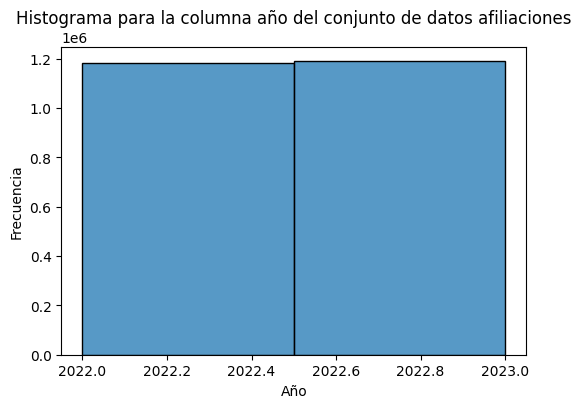

In [17]:
histograma_col_ano_afiliaciones(df_afiliaciones)

La distribucion de los años en el conjunto de datos afiliaciones esta balanceada.

A continuacion se visualiza la distribucion en la columna edad del conjunto de datos afiliaciones.

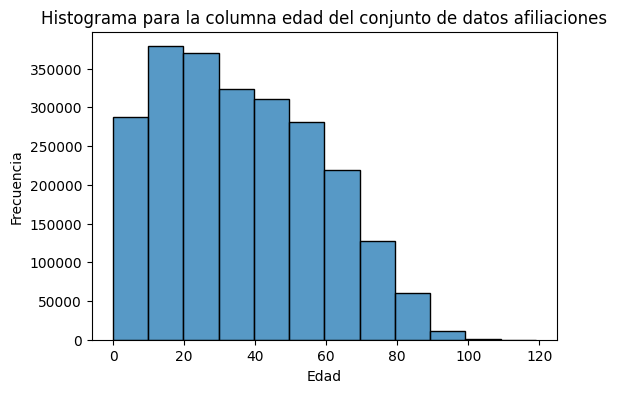

In [18]:
histograma_col_edad_afiliaciones(df_afiliaciones)

Las edades en el conjunto de datos afiliaciones se concentran en el rango de 20 a 50 años, la frecuencia de edades superiores tiene menor participacion. Las edades de 1 a 10 tienen una participacion significativa en el conjunto de datos. Mas del 50% de la poblacion tiene menos de 60 años de edad. Esta situacion favorece la producctividad del departamento al contar con mano de obra activa.

A continuacion se visualiza la distrubucion de la columna año en el conjunto de datos centros poblados.

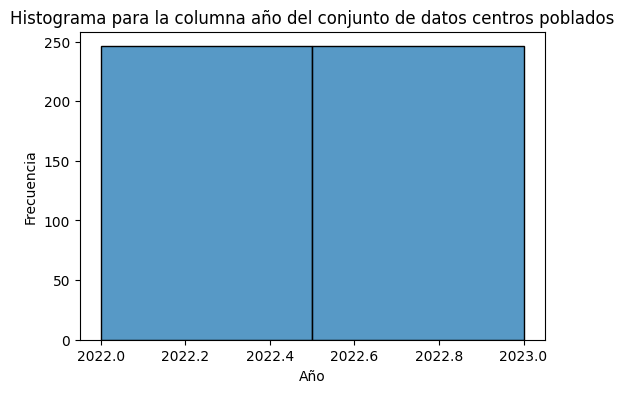

In [19]:
histograma_col_ano_centros_poblados(df_centros_poblados)

La distribucion de los valores en la columna año del conjunto de datos centros poblados se encuentra balanceada.

A continuacion se graficara la distribucion por genero en el conjunto de datos centros poblados.

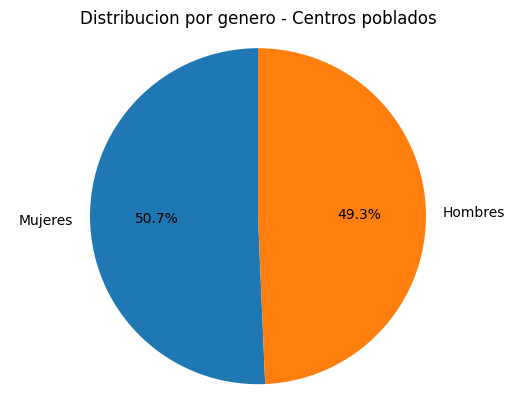

In [20]:
distribucion_genero_centros_poblados(df_centros_poblados)

Los generos masculino y femenino en el conjunto de datos centros poblados se encuentran balanceados. Esto favorece el entrenamiento de los modelos y permite inferir que la población del departamento tiene casi la misma cantidad de mujeres y hombres, lo cual permite la inclusión de género.

e procede a graficar la frecuencia de las columnas categoricas en los conjuntos de datos afiliaciones, centros poblados e instituciones educativas:

- Afiliaciones: municipio, sexo, regimen, estado.
- Centros poblados: municipio, area_geografica.
- Instituciones educativas: municipio, vereda.

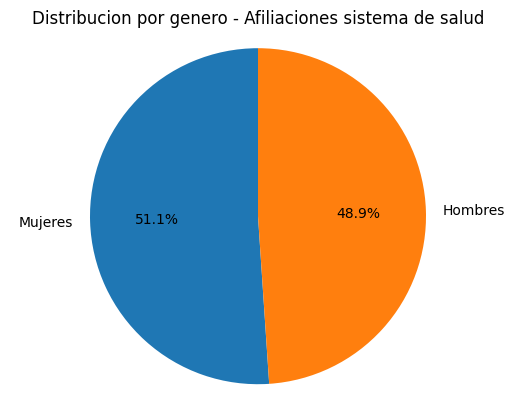

In [21]:
distribucion_genero_afiliaciones(df_afiliaciones)

La distribucion por genero en el conjunto de datos se encuentra balanceada al igual que en el conjunto de datos centros poblados. Lo cual favorece el entrenamiento de los modelos y permite inferir que la cobertura de salud en el departamento no tiene discriminacion de género.

A continuacion se grafica la frecuencia de afiliaciones al sistema de salud por municipio.

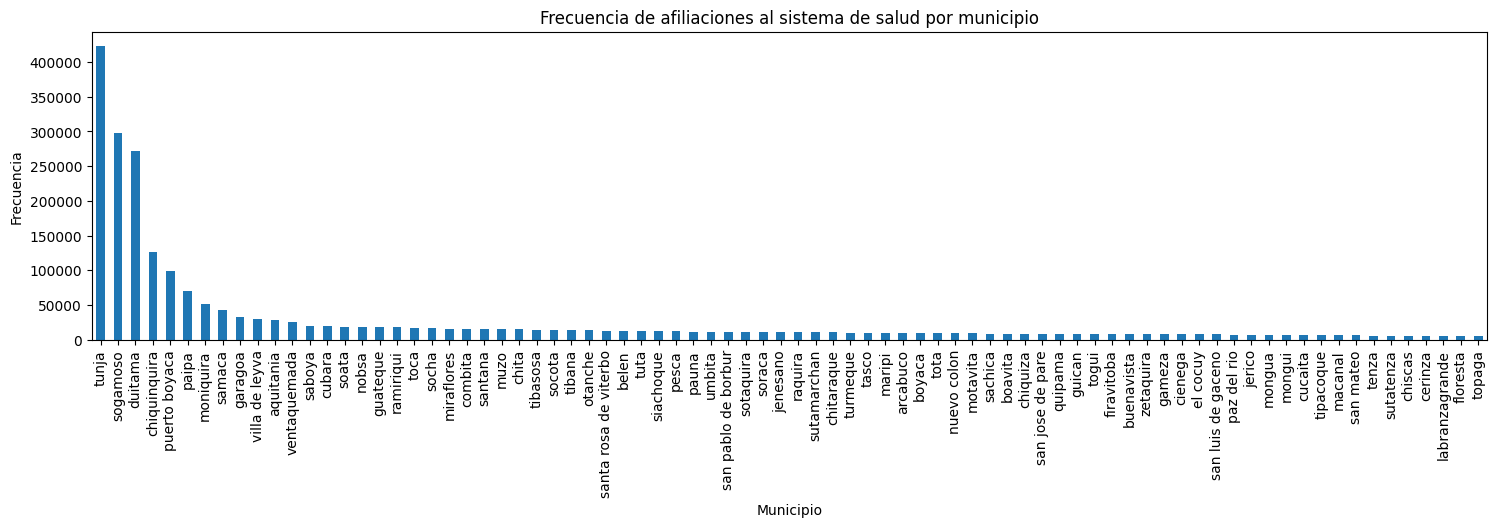

In [22]:
frecuencia_afiliacion_municipio(df_afiliaciones)

Análisis de cobertura y focalización poblacional:

Mas del 70% de la poblacion del departamento se concentra en solo 3 (Tunja, Sogamoso y Duitama) de los 123 municipios. Esto implica tres escenarios según el objetivo:

- **Cobertura departamental**: alcanzar todo el territorio es más lento, ya que requiere presencia en los 123 municipios.

- **Entrega de beneficios**: si se prioriza llegar rápidamente a la población, enfocar esfuerzos en los 12 municipios más poblados acelera el proceso.

- **Desarrollo por municipio**: Al concentrarse la poblacion en unos pocos municipios, hace que el desarrollo de estos sea mayor al resto, lo que genera a su vez desigualdades significativas en los niveles de desarrollo departamental.

A continuacion se grafica la frecuencia por regimen de afiliacion al sistema de salud.

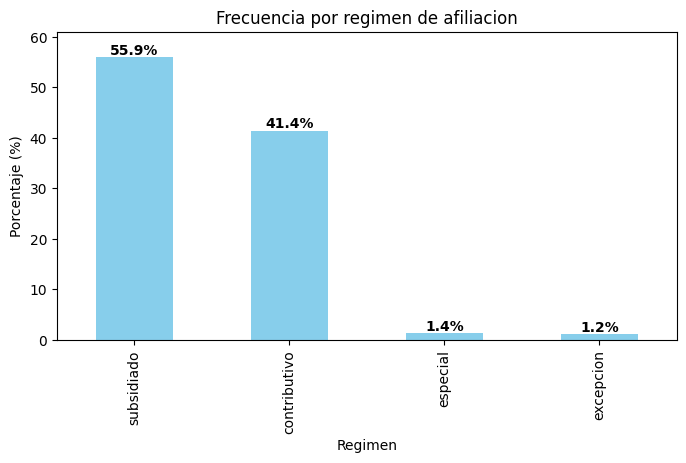

In [23]:
frecuencia_regimen_afiliacion(df_afiliaciones)

La grafica de frecuencia de la columna regimen en el conjunto de datos afiliaciones, permite inferir que en el departamento mas del 50% de la poblacion se encuentra en una de las siguientes condiciones:

 - Personas desempleadas sin ingresos.
 - Trabajadores informales de bajos ingresos.
 - Habitantes de calle.
 - Comunidades indígenas y afrodescendientes vulnerables.
 - Población desplazada por el conflicto armado.
 - Reinsertados y desmovilizados.
 - Personas en situación de pobreza extrema o vulnerabilidad social.

Esta situacion muestra una tendencia de pobreza en el departamento, lo que a su vez demanda gran atencion por parte del gobierno para lograr mejorar la calidad de vida de los habitantes del departamento.

A continuacion se grafica la frecuencia de estado en afiliaciones al sistema de salud.

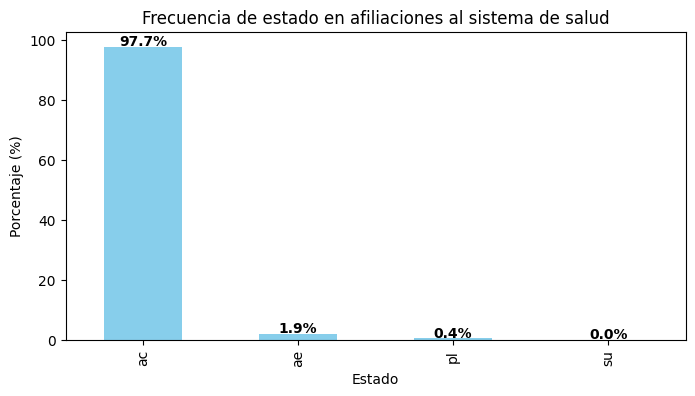

In [24]:
frecuencia_estado_afiliacion(df_afiliaciones)

Los posibles estados que puede tomar una afiliacion al sistema de salud, son los siguientes:

 - **Activo cotizante**: ac (97.7%).
 - **Activo estudiante** o **Activo especial**: ae (1.9%).
 - **Pleno derecho**: pl (0.4%).
 - **Suspendido**: su (0.0%).

 En el conjunto de datos afiliaciones, el **97.7%** corresponde a afiliaciones activas, dejando solo un **2.3%** a los demas estados. Esto muestra que el sistema de salud atiende casi el 100% de sus afiliados en el departamento.

 A continuacion se grafica la frecuencia de areas geograficas en centros poblados.

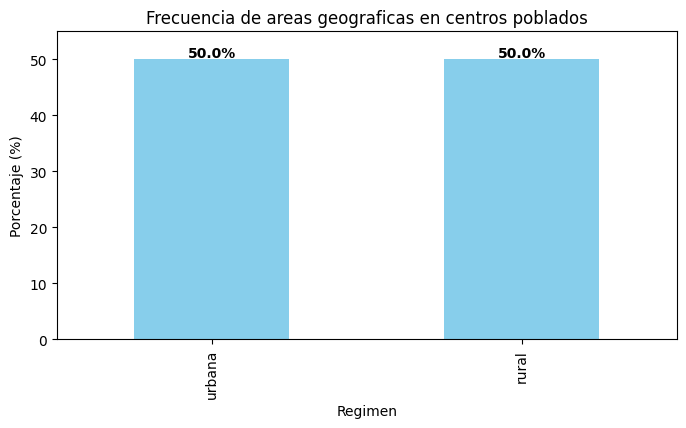

In [25]:
frecuencia_area_geografica_centros_poblados(df_centros_poblados)

Las clases en la columna área geográfica del conjunto de datos centros poblados, se encuentran balanceadas, lo cual favorece el entrenamiento de los modelos. Un aspecto relevante que se puede inferir al observar las participaciones de cada una de las clases, es la gran ruralidad que tiene el departamento, situación que le brinda pros y contra según como se direccionen las políticas públicas en la región. Si se apoya el área rural se impacta de manera positiva la economía de la región y al realizar acciones contrarias, se desaprovecha el potencial comercial de los municipios y fomenta la pobreza.

A continuacion se grafica la frecuencia de instituciones educativas por municipio.

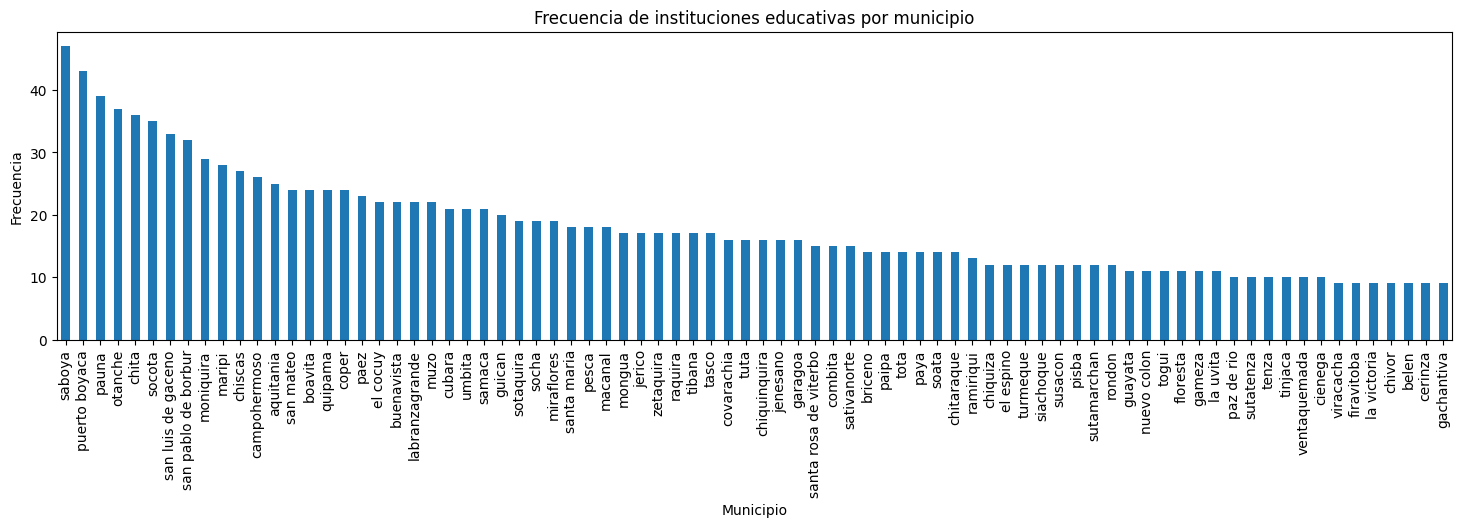

In [26]:
frecuencia_ie_municipio(df_ie)

Al analizar los municipios con mayor número de instituciones educativas ubicadas en zonas rurales de difícil acceso, se observa que estos suelen corresponder a aquellos con menor densidad poblacional. Esta situación incide directamente en los bajos niveles de desarrollo de dichas comunidades, generando un círculo vicioso: la escasa población limita el desarrollo, lo cual dificulta el acceso a la educación, y esto, a su vez, se traduce en bajos índices de alfabetización.

 A continuacion se grafica la frecuencia de instituciones educativas por vereda.

Total instituciones educativas -- >  1685
Total veredas -- >  1178
Promedio de instituciones educativas por vereda -- > 1.43


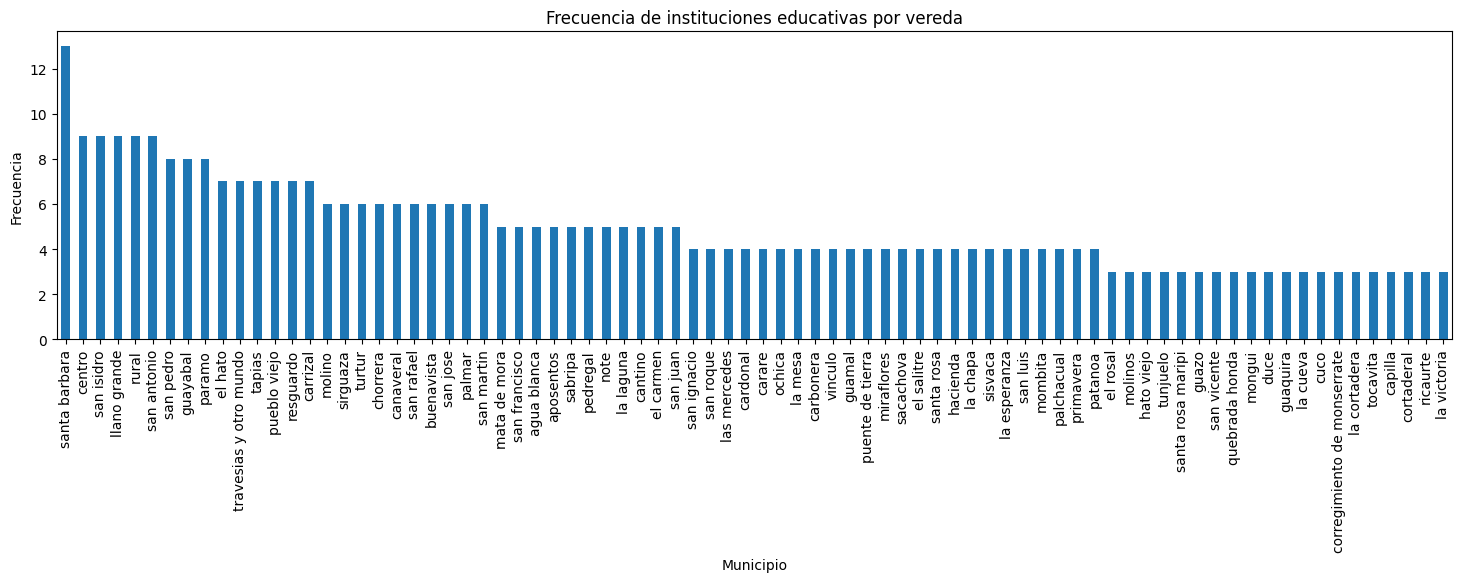

In [27]:
frecuencia_ie_vereda(df_ie)

En el conjunto de datos correspondiente a instituciones educativas se registran 1.178 veredas y 1.685 instituciones educativas, lo que representa un promedio de 1,43 instituciones por vereda. Este promedio se confirma al analizar la gráfica, donde se evidencia que a partir de la vereda número 61, el número de instituciones educativas por vereda alcanza las 3, para luego disminuir progresivamente hasta llegar a 1. Teniendo en cuenta que existen 178 veredas y que a partir de la número 61 la cantidad de instituciones por vereda empieza a disminuir, se concluye que la oferta educativa actual no cubre de manera satisfactoria la demanda académica.

## Union de los conjuntos de datos

Debido a la gran diferencia en los tamaños que presentan los conjuntos de datos, se procedera a realizar agregraciones para lograr reducir el numero de filas y conservar la informacion para cada municipio y año.

### Agregacion conjunto de datos afiliaciones

In [28]:
# Creacion del conjunto de datos afiliaciones agrupado por año y municipio
df_afiliaciones_agg = df_afiliaciones.groupby(['ano', 'municipio']).agg(
                                                                      total_afiliados=('sexo', 'count'),
                                                                      edad_promedio =('edad', 'mean'),
                                                                      mujeres=('sexo', lambda x: (x == 'f').sum()),
                                                                      hombres=('sexo', lambda x: (x == 'm').sum()),
                                                                      regimen_subsidiado=('regimen', lambda x: (x == 'subsidiado').sum()),
                                                                      regimen_contributivo=('regimen', lambda x: (x == 'contributivo').sum()),
                                                                      regimen_especial=('regimen', lambda x: (x == 'especial').sum()),
                                                                      regimen_excepcion=('regimen', lambda x: (x == 'excepcion').sum()),
                                                                      estado_ac=('estado', lambda x: (x == 'ac').sum()),
                                                                      estado_ae=('estado', lambda x: (x == 'ae').sum())
                                                                      ).reset_index()

# Calculo de porcentajes
df_afiliaciones_agg['porcentaje_mujeres_afiliadas'] = (df_afiliaciones_agg['mujeres'] / df_afiliaciones_agg['total_afiliados']) * 100
df_afiliaciones_agg['porcentaje_hombres_afiliados'] = (df_afiliaciones_agg['hombres'] / df_afiliaciones_agg['total_afiliados']) * 100

df_afiliaciones_agg['porcentaje_r_subsidiado'] = (df_afiliaciones_agg['regimen_subsidiado'] / df_afiliaciones_agg['total_afiliados']) * 100
df_afiliaciones_agg['porcentaje_r_contributivo'] = (df_afiliaciones_agg['regimen_contributivo'] / df_afiliaciones_agg['total_afiliados']) * 100
df_afiliaciones_agg['porcentaje_r_especial'] = (df_afiliaciones_agg['regimen_especial'] / df_afiliaciones_agg['total_afiliados']) * 100
df_afiliaciones_agg['porcentaje_r_excepcion'] = (df_afiliaciones_agg['regimen_excepcion'] / df_afiliaciones_agg['total_afiliados']) * 100

df_afiliaciones_agg['porcentaje_e_ac'] = (df_afiliaciones_agg['estado_ac'] / df_afiliaciones_agg['total_afiliados']) * 100
df_afiliaciones_agg['porcentaje_e_ae'] = (df_afiliaciones_agg['estado_ae'] / df_afiliaciones_agg['total_afiliados']) * 100

df_afiliaciones_agg = df_afiliaciones_agg.round(2)

print('Tamaño del nuevo conjunto datos afiliaciones -- > ', df_afiliaciones_agg.shape)
print('\nEstructura del nuevo conjunto de datos afiliaciones')
print(df_afiliaciones_agg.info())

Tamaño del nuevo conjunto datos afiliaciones -- >  (246, 20)

Estructura del nuevo conjunto de datos afiliaciones
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           246 non-null    int64  
 1   municipio                     246 non-null    object 
 2   total_afiliados               246 non-null    int64  
 3   edad_promedio                 246 non-null    float64
 4   mujeres                       246 non-null    int64  
 5   hombres                       246 non-null    int64  
 6   regimen_subsidiado            246 non-null    int64  
 7   regimen_contributivo          246 non-null    int64  
 8   regimen_especial              246 non-null    int64  
 9   regimen_excepcion             246 non-null    int64  
 10  estado_ac                     246 non-null    int64  
 11  estado_ae

Se logro agrupar por año y municipio, toda la informacion del conjunto de datos **afiliaciones**. Se crearon columnas con el numero total y porcentaje para cada municipio y año , al igual que para los datos de sexo, regimen y estado.

### Agregacion conjunto de datos centros poblados

In [29]:
# Creacion de las columnas con el total de poblacion para cada area geografica
df_centros_poblados['poblacion_rural'] = df_centros_poblados.apply(lambda row: row['total_mujeres'] + row['total_hombres']
                                                                                     if row['area_geografica'] == 'rural' else 0, axis=1)


df_centros_poblados['poblacion_urbana'] = df_centros_poblados.apply(lambda row: row['total_mujeres'] + row['total_hombres']
                                                                                     if row['area_geografica'] == 'urbana' else 0, axis=1)

# Creacion del conjunto de datos agrupado por año y municipio
df_centros_poblados_agg = df_centros_poblados.groupby(['ano', 'municipio']).agg(
                                                                                          total_poblacion_rural = ('poblacion_rural', 'sum'),
                                                                                          total_poblacion_urbana = ('poblacion_urbana', 'sum')
                                                                                          ).reset_index()


# Creacion de los porcentajes
df_centros_poblados_agg['porcentaje_poblacion_rural'] = (df_centros_poblados_agg['total_poblacion_rural'] /
                                                         (df_centros_poblados_agg['total_poblacion_rural'] + df_centros_poblados_agg['total_poblacion_urbana'])) * 100

df_centros_poblados_agg['porcentaje_poblacion_urbana'] = (df_centros_poblados_agg['total_poblacion_urbana'] /
                                                         (df_centros_poblados_agg['total_poblacion_rural'] + df_centros_poblados_agg['total_poblacion_urbana'])) * 100

df_centros_poblados_agg = df_centros_poblados_agg.round(2)

print('Tamaño del nuevo conjunto datos centros poblados -- > ', df_centros_poblados_agg.shape)
print('\nEstructura del nuevo conjunto de datos centros poblados')
print(df_centros_poblados_agg.info())


Tamaño del nuevo conjunto datos centros poblados -- >  (246, 6)

Estructura del nuevo conjunto de datos centros poblados
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ano                          246 non-null    int64  
 1   municipio                    246 non-null    object 
 2   total_poblacion_rural        246 non-null    int64  
 3   total_poblacion_urbana       246 non-null    int64  
 4   porcentaje_poblacion_rural   246 non-null    float64
 5   porcentaje_poblacion_urbana  246 non-null    float64
dtypes: float64(2), int64(3), object(1)
memory usage: 11.7+ KB
None


Se logro agrupar por año y municipio toda la informacion del conjunto de datos **centros poblados**. Se crearon columnas con el numero total y porcentaje para cada municipio y año al igual que para los datos de poblacion rural y poblacion urbana contenidos en la columna area geografica.

### Agregacion conjunto de datos instituciones educativas

In [30]:
# Creacion del conjunto de datos agrupado por municipio
df_ie_agg = df_ie.groupby('municipio').agg(instituciones_municipio = ('vereda', 'count'),
                                           veredas_municipio = ('vereda', 'nunique')
                                           ).reset_index()
# Creacion porcentaje cubrimiento servicio de educacion por municipio
df_ie_agg['promedio_ie_por_vereda'] = (df_ie_agg['instituciones_municipio'] / df_ie_agg['veredas_municipio'])


df_ie_agg = df_ie_agg.round(2)

print('Tamaño del nuevo conjunto datos instituciones educativas -- > ', df_ie_agg.shape)
print('\nEstructura del nuevo conjunto de datos instituciones educativas')
print(df_ie_agg.info())


Tamaño del nuevo conjunto datos instituciones educativas -- >  (120, 4)

Estructura del nuevo conjunto de datos instituciones educativas
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   municipio                120 non-null    object 
 1   instituciones_municipio  120 non-null    int64  
 2   veredas_municipio        120 non-null    int64  
 3   promedio_ie_por_vereda   120 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.9+ KB
None


Se logro agrupar por municipio toda la informacion del conjunto de datos **instituciones educativas**. Se crearon columnas con el numero total y porcentaje para cada municipio al igual que para los datos numero de instituciones educativas y veredas.

### Union de los tres conjuntos de datos

In [31]:
# Union de los conjuntos de datos afiliaciones y centros poblados
# que fueron filtrados por municipio y año
df_unificado = pd.merge(
                       df_afiliaciones_agg,
                       df_centros_poblados_agg,
                       on = ['municipio', 'ano'],
                       how='left'
                       )

print('Tamaño del nuevo conjunto de datos -- > ', df_unificado.shape)

Tamaño del nuevo conjunto de datos -- >  (246, 24)


Se procede a unir este nuevo conjunto de datos con el de instituciones educativas que fue agrupado por municipio.

In [32]:
# Union del nuevo conjunto de datos con instituciones educativas filtrado por municipio
df_unificado = pd.merge(
                       df_unificado,
                       df_ie_agg,
                       on = ['municipio'],
                       how = 'left'
                       )

print('Tamaño del nuevo conjunto de datos -- > ', df_unificado.shape)
print('\nEstructura del nuevo conjunto de datos ')
print(df_unificado.info())


Tamaño del nuevo conjunto de datos -- >  (246, 27)

Estructura del nuevo conjunto de datos 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           246 non-null    int64  
 1   municipio                     246 non-null    object 
 2   total_afiliados               246 non-null    int64  
 3   edad_promedio                 246 non-null    float64
 4   mujeres                       246 non-null    int64  
 5   hombres                       246 non-null    int64  
 6   regimen_subsidiado            246 non-null    int64  
 7   regimen_contributivo          246 non-null    int64  
 8   regimen_especial              246 non-null    int64  
 9   regimen_excepcion             246 non-null    int64  
 10  estado_ac                     246 non-null    int64  
 11  estado_ae                     2

Despues de unificar los conjuntos de datos por año y municipio, se observan ocho filas con valores nulos en las columnas **instituciones_municipio**, **veredas_municipio** y **porcentaje_cubrimiento_educacion_rural**.

Se procedera a eliminar estas filas para poder pasar al analisis de correlaciones.

In [33]:
# Se listan las filas con valores nulos
print(df_unificado[df_unificado['veredas_municipio'].isnull()])

      ano    municipio  total_afiliados  edad_promedio  mujeres  hombres  \
30   2022      duitama           136454          36.41    71274    65180   
68   2022  paz del rio             3483          38.70     1789     1694   
95   2022     sogamoso           148879          36.41    77453    71426   
113  2022        tunja           211085          34.95   111582    99503   
153  2023      duitama           135254          36.92    70990    64264   
191  2023  paz del rio             3568          38.49     1845     1723   
218  2023     sogamoso           148328          36.81    77857    70471   
236  2023        tunja           211713          35.36   112832    98881   

     regimen_subsidiado  regimen_contributivo  regimen_especial  \
30                45424                 86102               278   
68                 1520                  1941                 0   
95                50460                 94083               162   
113               56308                142468  

Se observa que para los siguiente municipios no hay informacion de poblacion por area geografica ni cobertura de sedes educativas:

 - **Tunja**
 - **Duitama**
 - **Sogamoso**
 - **Paz del Rio**

 Estas filas seran eliminadas.

In [34]:
df_unificado = df_unificado.dropna()

print('Valores nulos en el conjunto de datos unificados')
print(df_unificado.isnull().sum())

Valores nulos en el conjunto de datos unificados
ano                             0
municipio                       0
total_afiliados                 0
edad_promedio                   0
mujeres                         0
hombres                         0
regimen_subsidiado              0
regimen_contributivo            0
regimen_especial                0
regimen_excepcion               0
estado_ac                       0
estado_ae                       0
porcentaje_mujeres_afiliadas    0
porcentaje_hombres_afiliados    0
porcentaje_r_subsidiado         0
porcentaje_r_contributivo       0
porcentaje_r_especial           0
porcentaje_r_excepcion          0
porcentaje_e_ac                 0
porcentaje_e_ae                 0
total_poblacion_rural           0
total_poblacion_urbana          0
porcentaje_poblacion_rural      0
porcentaje_poblacion_urbana     0
instituciones_municipio         0
veredas_municipio               0
promedio_ie_por_vereda          0
dtype: int64


Se procede a eliminar las columnas redundates en el nuevo conjunto de datos.

In [35]:
df_unificado['total_poblacion_municipio'] = df_unificado['total_poblacion_rural'] + df_unificado['total_poblacion_urbana']
df_unificado['cobertura_salud'] = (df_unificado['total_afiliados'] / df_unificado['total_poblacion_municipio']) * 100

# Eliminacion de columnas redundantes
df_unificado = df_unificado.drop(columns=['mujeres', 'hombres', 'regimen_subsidiado', 'regimen_contributivo',
                                          'regimen_especial', 'regimen_excepcion', 'estado_ac', 'estado_ae',
                                          'total_poblacion_rural', 'total_poblacion_urbana'])

print('Columnas finales del conjunto de datos unificados')
print(df_unificado.isnull().sum())

Columnas finales del conjunto de datos unificados
ano                             0
municipio                       0
total_afiliados                 0
edad_promedio                   0
porcentaje_mujeres_afiliadas    0
porcentaje_hombres_afiliados    0
porcentaje_r_subsidiado         0
porcentaje_r_contributivo       0
porcentaje_r_especial           0
porcentaje_r_excepcion          0
porcentaje_e_ac                 0
porcentaje_e_ae                 0
porcentaje_poblacion_rural      0
porcentaje_poblacion_urbana     0
instituciones_municipio         0
veredas_municipio               0
promedio_ie_por_vereda          0
total_poblacion_municipio       0
cobertura_salud                 0
dtype: int64


In [36]:
print(df_unificado.info())

<class 'pandas.core.frame.DataFrame'>
Index: 236 entries, 0 to 245
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ano                           236 non-null    int64  
 1   municipio                     236 non-null    object 
 2   total_afiliados               236 non-null    int64  
 3   edad_promedio                 236 non-null    float64
 4   porcentaje_mujeres_afiliadas  236 non-null    float64
 5   porcentaje_hombres_afiliados  236 non-null    float64
 6   porcentaje_r_subsidiado       236 non-null    float64
 7   porcentaje_r_contributivo     236 non-null    float64
 8   porcentaje_r_especial         236 non-null    float64
 9   porcentaje_r_excepcion        236 non-null    float64
 10  porcentaje_e_ac               236 non-null    float64
 11  porcentaje_e_ae               236 non-null    float64
 12  porcentaje_poblacion_rural    236 non-null    float64
 13  porcentaje

# Correlaciones

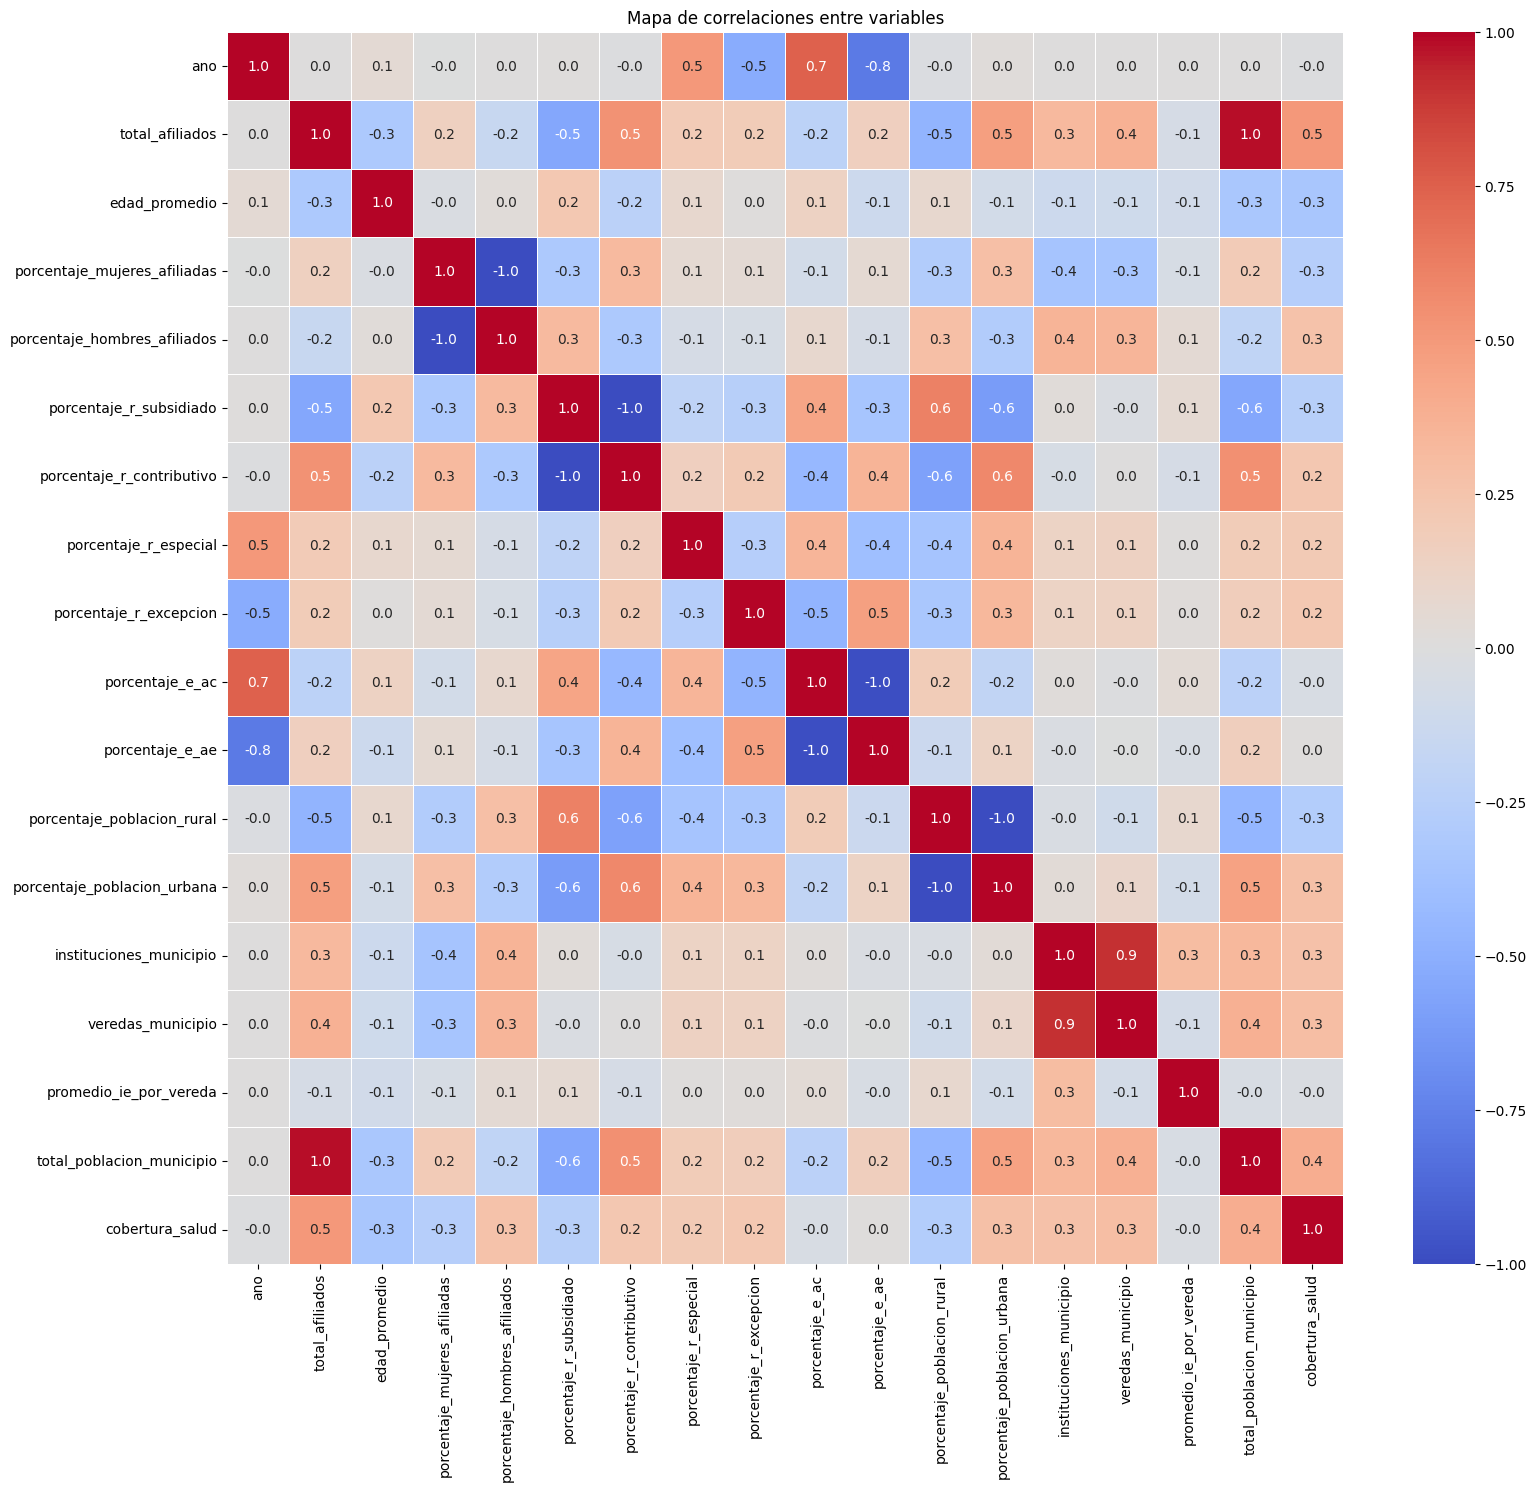



Correlaciones fuertes
                      Columna1                     Columna2  Correlacion
0                          ano              porcentaje_e_ac     0.743535
1              total_afiliados    total_poblacion_municipio     0.983568
2      porcentaje_r_subsidiado   porcentaje_poblacion_rural     0.614154
3    porcentaje_r_contributivo  porcentaje_poblacion_urbana     0.580649
4              porcentaje_e_ac                          ano     0.743535
5   porcentaje_poblacion_rural      porcentaje_r_subsidiado     0.614154
6  porcentaje_poblacion_urbana    porcentaje_r_contributivo     0.580649
7      instituciones_municipio            veredas_municipio     0.908328
8            veredas_municipio      instituciones_municipio     0.908328
9    total_poblacion_municipio              total_afiliados     0.983568


In [37]:
df_corr = mapacorrelacion_variables(df_unificado)

A continuacion se listan las correlaciones mas fuertes en el nuevo conjunto de datos.

In [38]:
correlaciones_fuertes = df_corr[(df_corr > 0.55) & (df_corr < 1)]
correlaciones_fuertes = correlaciones_fuertes.stack().reset_index()
correlaciones_fuertes.columns = ['Columna1', 'Columna2', 'Correlacion']
print('Correlaciones fuertes')
print(correlaciones_fuertes)

Correlaciones fuertes
                      Columna1                     Columna2  Correlacion
0                          ano              porcentaje_e_ac     0.743535
1              total_afiliados    total_poblacion_municipio     0.983568
2      porcentaje_r_subsidiado   porcentaje_poblacion_rural     0.614154
3    porcentaje_r_contributivo  porcentaje_poblacion_urbana     0.580649
4              porcentaje_e_ac                          ano     0.743535
5   porcentaje_poblacion_rural      porcentaje_r_subsidiado     0.614154
6  porcentaje_poblacion_urbana    porcentaje_r_contributivo     0.580649
7      instituciones_municipio            veredas_municipio     0.908328
8            veredas_municipio      instituciones_municipio     0.908328
9    total_poblacion_municipio              total_afiliados     0.983568


### **Analisis de correlaciones**

Despues de listar las correlaciones con indice superior a 0.55, se obtuvieron los siguientes resultados:

|           Columna1          |         Columna2            |  Correlacion  |
|-----------------------------|-----------------------------|---------------|
|ano                          | porcentaje_e_ac             |    0.744704   |
|porcentaje_r_subsidiado      | porcentaje_poblacion_rural  |    0.613875   |
|porcentaje_r_contributivo    | porcentaje_poblacion_urbana |    0.580228   |
|veredas_municipio            | instituciones_municipio     |    0.908328   |
|total_afiliados              | total_poblacion_municipio   |    0.983635   |


                      
De las anteriores correlaciones, resultan aportantes la relacion que existe entre el area geografica y el regimen, ya que se puede inferir que en las areas rurales prima el trabajo informal, caso contrartio de las areas urbanas. Por otra parte, la relacion que existe en el munero de veredas por municipio e instituciones educativas por municipio, indica que todas las veredas tiene al menos 1 instituciones educativa.

Continuando con la busqueda de correlaciones en la cobertura del sistema de salud y educacion, se usaran visualizaciones de relaciones cruzadas con grafico de dispersion.

A continuacion de grafica la correlacion de instituciones Educativas Rurales vs Regimen Sudsidiado.

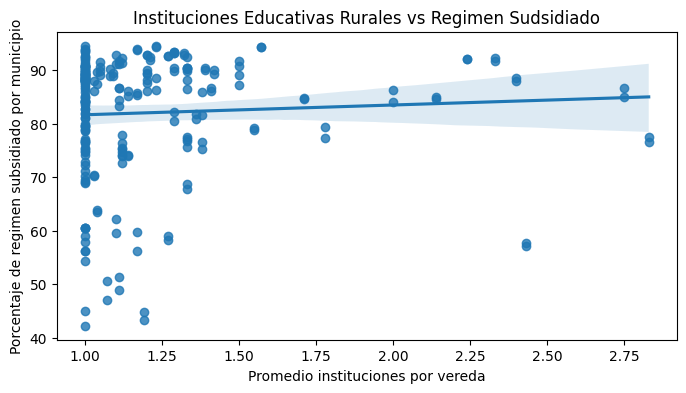

In [39]:
ie_rural_vsr_regimen_sudsidiado(df_unificado)

No se halla correlacion en el numero de instituciones educativas por vereda y el porcentaje de la poblacion afiliada al regimen subsidiado de salud. En la grafica se puede observar gran predominio de cobertura de salud bajo el regimen sudsidiado.

A continuacion de grafica la correlacion de Instituciones Educativas Rurales vs Regimen Contributivo.

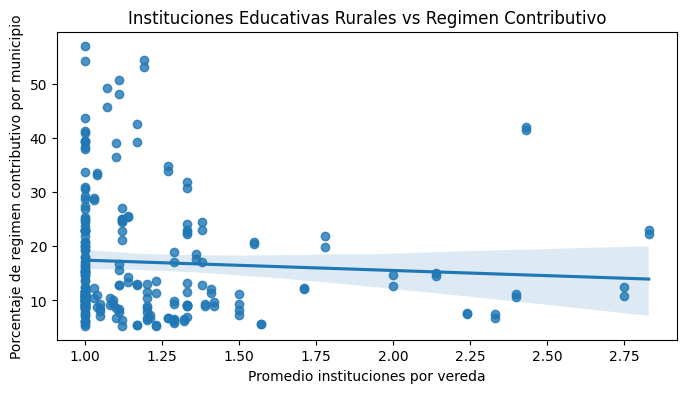

In [40]:
ie_rural_vs_regimen_contributivo(df_unificado)

No se halla correlacion en el numero de instituciones educativas por vereda y el porcentaje de la poblacion afiliada al regimen contributivo de salud. En la grafica se puede observar poca cobertura de salud bajo el regimen contributivo.

Se continua con el analisis de posibles correlaciones. A continuacion se grafican los porcentajes de poblacion rural vs el numero de instituciones educativas por vereda.

14


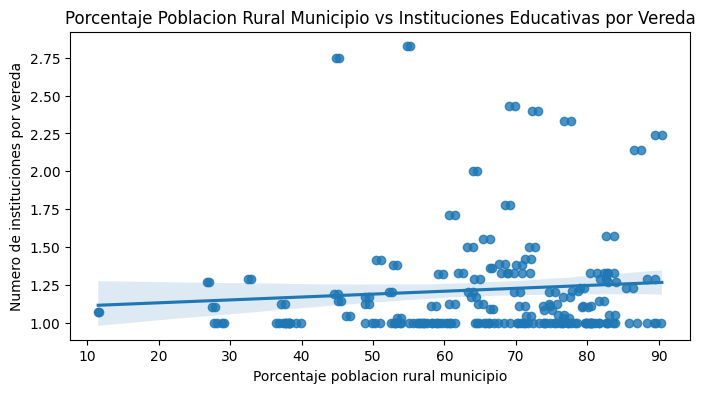

In [41]:
porcentaje_poblacion_rural_municipio_vs_ie_Vereda(df_unificado)

No se halla correlacion en las variables analizadas, se continua con el analisis.

A continuacion de grafica la correlacion del Porcentaje Poblacion Rural Municipio Vs. Porcentaje Afiliados Regimen Subsidiado.

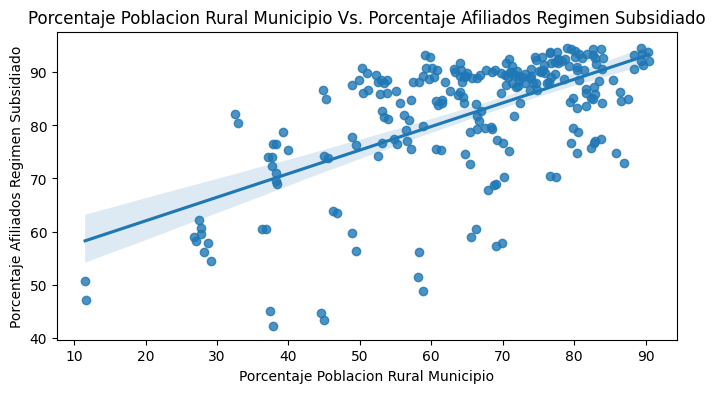

In [42]:
porcentaje_poblacion_rural_municipio_vs_porcentaje_afiliados_subsidiado(df_unificado)

En el grafico anterior no se observa una correlacion entre las variables pero si una tendencia que indica lo siguiente: un gran porcentaje la poblacion rural tiene regimen de salud subsidiado, esto se puede traducir en trabajo informal y bajo poder adquisitivo en la poblacion rural de los municipios.

A continuacion se grafica la correlacion del Porcentaje Poblacion Urbana Municipio Vs. Porcentaje Afiliados Regimen Subsidiado.

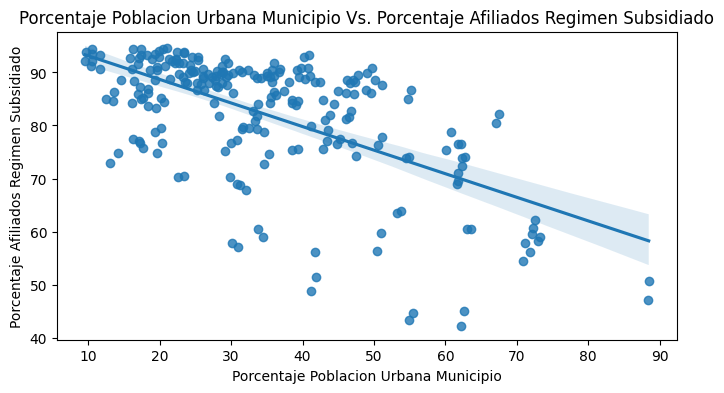

In [43]:
porcentaje_poblacion_urbana_municipio_vs_porcentaje_afiliados_subsidiado(df_unificado)

En el grafico anterior no se observa una correlacion entre las variables pero si una tendencia que indica lo siguiente: un gran porcentaje de la poblacion urbana no tiene regimen de salud subsidiado, esto se puede traducir en trabajo formal y un mayor poder adquisitivo en la poblacion urbana en comparacion con la rural de cada municipio.

En las correlaciones analizadas no se encuentran dependencias en variables educativas con las pertenecientes al sistema de salud, por tanto no se pueden encontrar las correlaciones que son el objetivo del proyecto.

Por otra parte, se usaran los datos procesados para poder encontrar los municipios con mayor participacion de ruralidad y menor cobertura del sistema de salud, tambien se generaran proyecciones de la poblacion y la cobertura del sistema de salud para predecir posibles escenarios poblacionales y de calidad de vida en el departamento.

# Predicciones

A continuacion de agruparan los municipios para poder clasificarlos y encontrar los que mas poblacion rural tienen y a la vez poseen menor cobertura en salud.

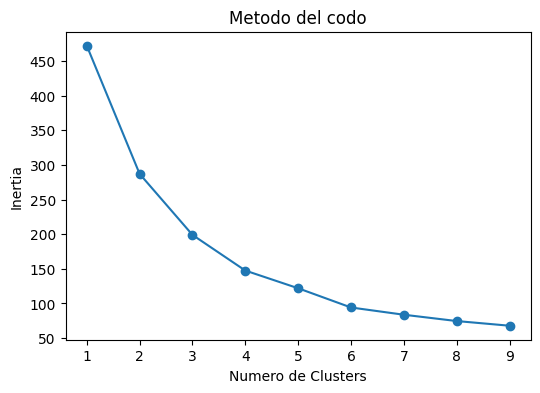

In [44]:
var_cluster_escaladas = metodo_codo(df_unificado)

Al analizar el grafico, se observa que con 4 clusters el valor de inertia dismuye significativamente con respecto a los 3 anteriores, y deja se hacerlo a partir del 5 cluster. Por lo anterior se toma 4 como la cantidad optima de clusters para generar las agrupaciones de municipios.

A continuacion de grafican los Clusters Poblacion Rural vs Cobertura Salud.

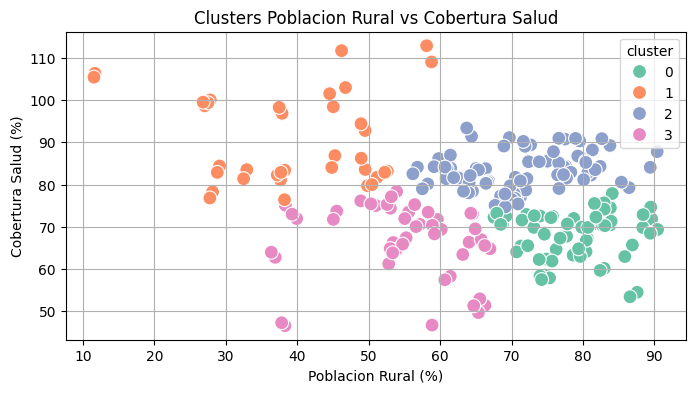

In [45]:
visualizacion_clusters__poblacion_rural_cobertura_salud(df_unificado, var_cluster_escaladas)

La seleccion de 4 clusters permitio separar de manera clara los municipio tomando como variables de agrupamiento el **porcentaje de poblacion rural** y la **cobertura en salud del municipio**. Se procede al analisis de los promedios en las variables de agrupamiento para encontrar el grupo objetivo.

In [46]:
# Visualizacion de clusters, promedio de poblacion rural y cobertura de salud
df_unificado.groupby('cluster')[['porcentaje_poblacion_rural', 'cobertura_salud']].mean()

,porcentaje_poblacion_rural,cobertura_salud
cluster,,
0,78.944545,68.273120
1,39.406944,90.839508
2,71.418214,83.077458
3,54.952800,66.674224


Al analizar el promedio de poblacion rural y cobertura en salud para cada unos de los cluster, se observa que el cluster **No 0** es el que tiene la mayor poblacion rural y el menor cubrimiento en salud.

In [47]:
# Se filtran y visualizan las filas pertenecientes al cluster No 0
# Ordenadas por cobertura en salud
cluster_objetivo = df_unificado[df_unificado['cluster']==0]
cluster_objetivo = cluster_objetivo.sort_values(by='cobertura_salud', ascending=True).reset_index(drop=True)
print(cluster_objetivo[['ano', 'municipio', 'porcentaje_poblacion_rural', 'cobertura_salud']].sort_values(by=['cobertura_salud']))
print('\nValores unicos en municipio -- > ', cluster_objetivo['municipio'].nunique() )

     ano     municipio  porcentaje_poblacion_rural  cobertura_salud
0   2023       combita                       86.59        53.411054
1   2022       combita                       87.59        54.483360
2   2023     somondoco                       74.21        57.480315
3   2022     somondoco                       75.32        57.887745
4   2023       macanal                       73.98        58.338055
..   ...           ...                         ...              ...
61  2022        tutaza                       89.49        74.659784
62  2022       cuitiva                       83.55        75.026624
63  2023  ventaquemada                       81.60        75.516137
64  2023        maripi                       82.96        75.681516
65  2022        maripi                       84.10        77.874916

[66 rows x 4 columns]

Valores unicos en municipio -- >  33


De los 123 municipio que tiene en departamento de Boyaca, 33 de ellos tiene una cobertua en salud deficiente, esto se traduce en mas del 25% de los munucipios del departamento no cuentan con cobertura optima en salud. Lo anterior impacta de manera directa el desarrollo de estos municipios y por ende el del departamento, al no poder garantizar calidad en el servicio de salud se es mas suceptible a enfermedades y bajos niveles de competitividad.

In [48]:
# Listado de municipios pertenecientes al cluster No 0
print(cluster_objetivo['municipio'].unique())

['combita' 'somondoco' 'macanal' 'oicata' 'pachavita' 'tinjaca'
 'sotaquira' 'beteitiva' 'almeida' 'chivor' 'sutatenza' 'coper' 'chivata'
 'paya' 'susacon' 'saboya' 'chiscas' 'caldas' 'sora' 'umbita'
 'san miguel de sema' 'tuta' 'topaga' 'tibana' 'campohermoso' 'tenza'
 'viracacha' 'jenesano' 'tutaza' 'ventaquemada' 'motavita' 'cuitiva'
 'maripi']


Los anteriores son los municipios que tienen menor cobertura en salud y y mayor población rural en el departamento para los años 2022 y 2023.

Se procede a listar los porcentajes de poblaciobn rural y cobertura del sistema de salud para los municipios analizados, para los años 2022 y 2023.

In [49]:
print(cluster_objetivo[['ano', 'municipio', 'porcentaje_poblacion_rural', 'cobertura_salud']].sort_values(by=['municipio']))

     ano     municipio  porcentaje_poblacion_rural  cobertura_salud
14  2022       almeida                       79.82        63.995994
13  2023       almeida                       78.62        63.300493
16  2022     beteitiva                       80.43        64.120256
12  2023     beteitiva                       79.63        62.970200
43  2022        caldas                       89.63        71.862535
..   ...           ...                         ...              ...
34  2023        umbita                       83.07        70.253960
63  2023  ventaquemada                       81.60        75.516137
56  2022  ventaquemada                       82.58        73.796663
59  2022     viracacha                       82.69        74.372030
47  2023     viracacha                       81.81        72.294807

[66 rows x 4 columns]


Se observa que no hay variacion significativa de una año a otro en la cobertura del servicio de salud en los municipios, esto permite inferir que no existen programas efectivos para aumentar la cobertura del sistema de salud.

A continucion se procede a generar las predicciones de poblacion y cobertura del sistema de salud en el departamento.

In [50]:
x, y, modelo_poblacion, features_escaladas, y_test_poblacion, target_predicciones = entrenamiento_validacion_prediciones_poblacion(df_unificado)

R2 -- > 94.6 %
MAPE --> 15.77 %


Se logra una efectividad del 94.65% en la prediccion de la poblacion, este modelo se puede usar para generar proyeccion de crecimiento poblacional y estimar a su vez la demanda se servicio que tendra el departamento en años futuros.

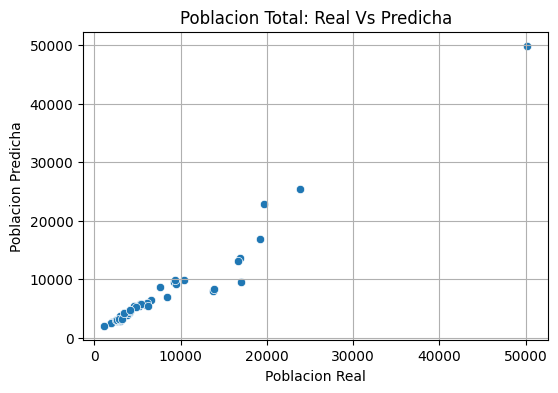

In [51]:
visualizacion_poblacion_real_vs_predicha(x, y)

Las metricas evaluadas y la grafica anterior de comparacion de datos reales vs predicciones, confirman que el modelo es eficiente en la proyeccion de la problacion.

El siguiente modelo busca predecir la cobertura del sistema de salud.

In [52]:
X, Y, modelo_salud, features_escaladas_salud, y_test_salud, target_predicciones_salud = entrenamiento_validacion_prediciones_cobertura_salud(df_unificado)

R2 -- > 70.34 %
MAPE --> 8.3 %


El modelo logra una efectividad del 71.51% en la prediccion de la cobertura del sistema de salud. Al igual que el modelo que predice la poblacion, este puede ser usado para generar proyecciones en la cobertura del sistema de salud, sin embargo, se puede mejorar para alcanzar una efectividad superior al 90%, para ello se recomienda adquirir otros conjuntos de datos relacionados con el sistema de salud, para mejorar el entrenamiento del modelo y por ende su desempeño.

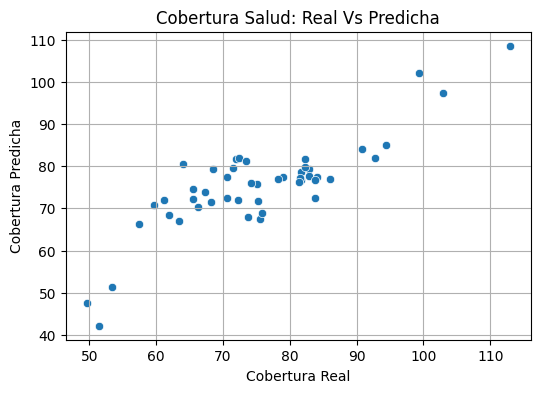

In [53]:
visualizacion_cobertura_salud_real_vs_predicha(X, Y)

Las metricas evaluadas y la grafica de comparacion de datos reales vs predicciones, confirman que el modelo aunque supera el 70% de prediccions correctas, aun tiene margen de mejora. Se podria mejorar los resultados obteniendo mas conjuntos de datos relacionados con la cobertura del sistema de salud en el departamento.

In [54]:
proyecciones_poblacion_cobertura_salud(df_unificado, modelo_salud, features_escaladas_salud, modelo_poblacion, features_escaladas)

    ano  total_poblacion_municipio  proyeccion_poblacion_municipio  \
0  2022                   827397.0                   822127.866321   
1  2023                   836385.0                   830100.037827   

   porcentaje_poblacion_rural  cobertura_salud  proyeccion_cobertura_salud  
0                   65.516441        76.765624                   76.332310  
1                   64.786610        76.526459                   77.002432  


Graficas del proyecto:

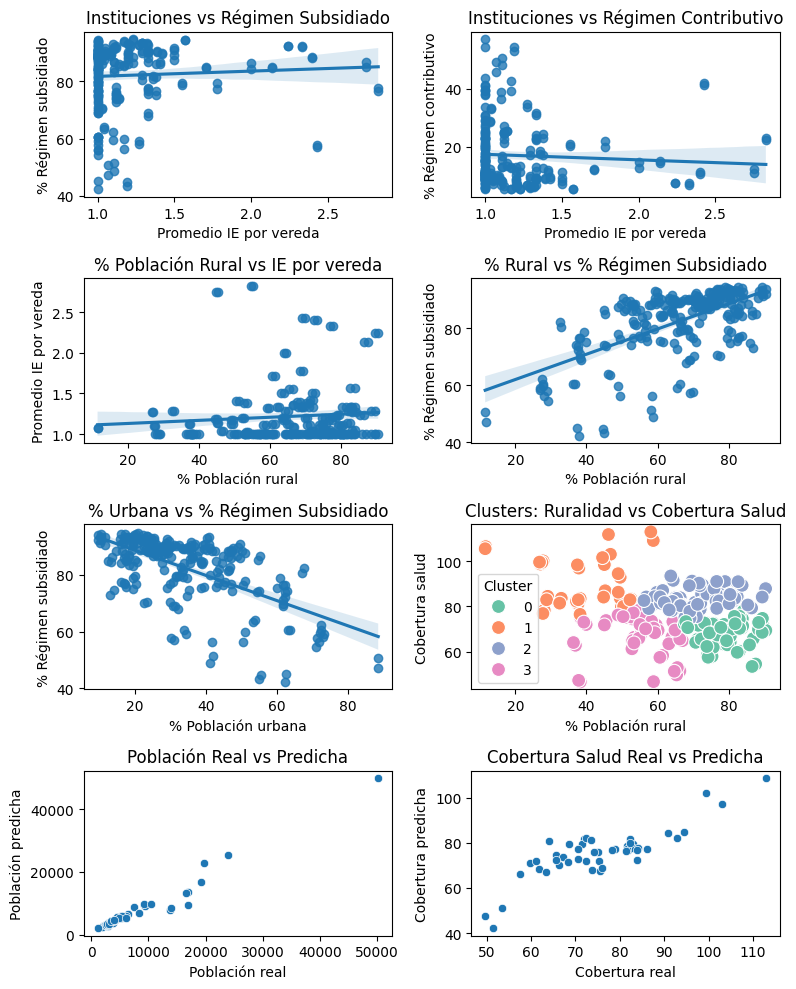

In [55]:
# Creacion de la cuadricula para posicionar los graficos
fig, axs = plt.subplots(4, 2, figsize=(8, 10))

# Grafico 1
sns.regplot(data=df_unificado, x='promedio_ie_por_vereda', y='porcentaje_r_subsidiado', ax=axs[0, 0])
axs[0, 0].set_title('Instituciones vs Régimen Subsidiado')
axs[0, 0].set_xlabel('Promedio IE por vereda')
axs[0, 0].set_ylabel('% Régimen subsidiado')

# Grafico 2
sns.regplot(data=df_unificado, x='promedio_ie_por_vereda', y='porcentaje_r_contributivo', ax=axs[0, 1])
axs[0, 1].set_title('Instituciones vs Régimen Contributivo')
axs[0, 1].set_xlabel('Promedio IE por vereda')
axs[0, 1].set_ylabel('% Régimen contributivo')

# Grafico 3
sns.regplot(data=df_unificado, x='porcentaje_poblacion_rural', y='promedio_ie_por_vereda', ax=axs[1, 0])
axs[1, 0].set_title('% Población Rural vs IE por vereda')
axs[1, 0].set_xlabel('% Población rural')
axs[1, 0].set_ylabel('Promedio IE por vereda')

# Grafico 4
sns.regplot(data=df_unificado, x='porcentaje_poblacion_rural', y='porcentaje_r_subsidiado', ax=axs[1, 1])
axs[1, 1].set_title('% Rural vs % Régimen Subsidiado')
axs[1, 1].set_xlabel('% Población rural')
axs[1, 1].set_ylabel('% Régimen subsidiado')

# Grafico 5
sns.regplot(data=df_unificado, x='porcentaje_poblacion_urbana', y='porcentaje_r_subsidiado', ax=axs[2, 0])
axs[2, 0].set_title('% Urbana vs % Régimen Subsidiado')
axs[2, 0].set_xlabel('% Población urbana')
axs[2, 0].set_ylabel('% Régimen subsidiado')

# Grafico 6
sns.scatterplot(
    data=df_unificado,
    x='porcentaje_poblacion_rural',
    y='cobertura_salud',
    hue='cluster',
    palette='Set2',
    s=100,
    ax=axs[2, 1]
)
axs[2, 1].set_title('Clusters: Ruralidad vs Cobertura Salud')
axs[2, 1].set_xlabel('% Población rural')
axs[2, 1].set_ylabel('Cobertura salud')
axs[2, 1].legend(title='Cluster', loc='best')

# Grafico 7
sns.scatterplot(x=y_test_poblacion, y=target_predicciones, ax=axs[3, 0])
axs[3, 0].set_title('Población Real vs Predicha')
axs[3, 0].set_xlabel('Población real')
axs[3, 0].set_ylabel('Población predicha')

# Grafico 8
sns.scatterplot(x=y_test_salud, y=target_predicciones_salud, ax=axs[3, 1])
axs[3, 1].set_title('Cobertura Salud Real vs Predicha')
axs[3, 1].set_xlabel('Cobertura real')
axs[3, 1].set_ylabel('Cobertura predicha')

# Se ajusta distribucion
plt.tight_layout()

# Se guarda la imagen con los 8 graficos
plt.savefig("graficos_combinados.png", dpi=300, bbox_inches='tight')
plt.show()


# Conclusiones

 - **Crecimiento poblacional**: al revisar los datos totales de poblacion en el departamento para los años 2022 y 2023, se observa un crecimiento poco significativo, esto impacta de manera directa el desarrollo del departamento al no contar con nueva fuerza laboral, envejeciemto de su poblacion y desaceleracion de la dinamica comercial.
 - **Cobertura sistema de salud**: la cobertura del sistema de salud en el departamento solo cubre el 75% de la poblacion, y existen municipios que se encuentran por debajo ese umbral. Lo anterior impacta directamente en la calidad de vida de la poblacion y genera mayor presion en los servicios de emergencia.
 - **Escolaridad en zona rural**: mas del 60% de la poblacion del departamento se encuentra en zona rural, esto lleva a que la region no pueda acceder a servicios basicos como educacion, debido al dificil acceso de estas areas. Lo anterior lleva a un retraso en los niveles educativos y tiende aumentar el analfabetismo en el departamento.
 - **Regimen subsidiado de salud**: en el departamento mas del 50% de la poblacion que se encuentra afiliada al servicio de salud bajo el regimen subdiado, esto muestra gran informalidad en el trabajo, lo que a su vez genera falta de competitividad departamental e ineficiencia en el recaudo de impuestos.

Como conclusion final, se sugiere implementar proyectos de tecnificacion del area rural y mejora en las vias de acceso, para poder llevar al departamento a crecimientos sostenibles y mejora de la calidad de vida de sus habitantes.

Complementando la informacion analizada en este proyecto, se presenta la densidad poblacional del departamento y se suguieren las siguientes oportunidades de desarrollo:


| Departamento     |Población | Estimada 2024	Área (km²) | Densidad (hab/km²)|
|------------------|----------|--------------------------|------------------
| Antioquia	       | 6,903,721|	       63,612            |108
| Valle del Cauca	 | 4,650,000|        22,140            |210
| Atlantico	       | 2,827,124|         3,314            |853
| Boyaca	         | 1,311,983|        23,189            |56
| Santander	       | 2,306,000|        30,562            |75

  - **Turismo sostenible y de naturaleza**: aunque el departamento es fuerte en el campo turistico, aun tiene oportunidad de crecimiento y posicionamiento nacional en esta area, ya que cuenta con poca urbanizacion y esto permite ofrecer paisajes con mayor riqueza en fauna y flora.

  - **Agricultura extensiva y agroindustria con valor agregado**: al tener gran parte del territorio disponible para cultivos, es posible desarrollar proyecto de agricultura tecnificada y tambien se pueden crear empresas que transformen la produccion primaria en productos de mayor valor como conservas.

  - **Energias limpias y economia verde**: la baja densidad poblacional permite poder instalar proyectos de eneria solar, eolica o de biomasa sin que se generan conflictos del uso intensivo del suelo. Esto genera inversion en la region y demanda mano de obra calificada, que a su vez impactan de manera positiva y directa la ecomonomia de los municipios donde de desarrollen estos proyectos.




# Exportar resultados

Los conjunto de datos usados en el proyecto, se unificaron en uno solo y  se exportara a un archivo .csv para generar un dashboard interactivo que permitira generar visualizaciones de la coberturas de los servicios de educacion y salud en el despartamento de Boyacá.  

In [56]:
# Columnas a las que se les formateara con 2 decimales
# para su posterior analisis en el dashboard
columnas = ['total_afiliados',
            'edad_promedio',
            'porcentaje_mujeres_afiliadas',
            'porcentaje_hombres_afiliados',
            'porcentaje_r_subsidiado',
            'porcentaje_r_contributivo',
            'porcentaje_r_especial',
            'porcentaje_r_excepcion',
            'porcentaje_e_ac',
            'porcentaje_e_ae',
            'porcentaje_poblacion_rural',
            'porcentaje_poblacion_urbana',
            'instituciones_municipio',
            'veredas_municipio',
            'promedio_ie_por_vereda',
            'total_poblacion_municipio',
            'cobertura_salud',
            'proyeccion_poblacion_municipio',
            'proyeccion_cobertura_salud']

for columna in columnas:
  df_unificado[columna] = df_unificado[columna].round(2)

# Definir la carpeta donde guardaremos el archivo
carpeta_data = '/content/drive/MyDrive/health_education_data/data'

# Ruta completa del archivo CSV
ruta_csv = os.path.join(carpeta_data, 'df_unificado.csv')

# Exportar el DataFrame
df_unificado.to_csv(ruta_csv, index=False, encoding='utf-8')

print(f'Archivo exportado correctamente en: {ruta_csv}')


Archivo exportado correctamente en: /content/drive/MyDrive/health_education_data/data/df_unificado.csv


In [57]:
!pip freeze > requirements.txt
print("✅ Archivo requirements.txt creado correctamente.")


✅ Archivo requirements.txt creado correctamente.
